In [ ]:
pip install pydataxm

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split


In [7]:
from pydataxm.pydatasimem import CatalogSIMEM

catalogo_conjuntos = CatalogSIMEM('Datasets')

data = catalogo_conjuntos.get_data()
print(data)

    idDataset                                nombreConjuntoDatos  \
0      ADE905         Panorama energético Corto Plazo Generación   
1      a704ee  Datos soporte del proceso de liquidación por C...   
2      d808d4   Energía de Referencia para el Mercado Secundario   
3      2106b8  Precios y estadísticas de los contratos de con...   
4      F3A83B  Estadísticas de contratos de Demanda Desconect...   
..        ...                                                ...   
272    2C6C29  Acumulado anual de los calce u operaciones de ...   
273    f63b8b                   Déficit Energético Mediano Plazo   
274    29517d  Datos soporte del proceso de Demandas por Recu...   
275    841808  Listado de Áreas Operativas del Sistema de Int...   
276    8DECCA   Estadísticas de contratos del mercado secundario   

            fechaPublicacion       fechaActualizacion           inicioDato  \
0     2023-11-28T12:07:03.03  2025-02-06T14:30:25.907  2023-10-02T00:00:00   
1    2023-09-28T21:28:06.43

In [8]:
print("Nombre: ", catalogo_conjuntos.get_name())
print("Metadata: ", catalogo_conjuntos.get_metadata())
print("Columnas: ", catalogo_conjuntos.get_columns())

Nombre:  Catálogo de Datos y API
Metadata:                                           description         creationDate  \
0  Contiene la descripción de los conjuntos de da...  2023-11-16 07:30:06   

            lastUpdate nextUpdateDate entity category periodicity granularity  \
0  2025-04-05 20:10:38       4/5/2025  SIMEM       NA      Diaria          NA   

  historicData  private ultimaNovedad  
0           NA    False          None  
Columnas:              nameColumn    dataType  \
0            IdDataset       texto   
1  NombreConjuntoDatos       texto   
2     FechaPublicacion       fecha   
3   FechaActualizacion  fecha hora   
4           InicioDato       fecha   
5              FinDato       fecha   
6        FechaDescarga  fecha hora   
7       URLConexionAPI       texto   
8     URLConjuntoDatos       texto   
9      TipoPublicacion       texto   

                                         description  
0          Identificador único del conjunto de datos  
1                 

In [1]:
from pydataxm.pydatasimem import ReadSIMEM, CatalogSIMEM

# Buscar el id del conjunto de datos
catalogo = CatalogSIMEM('Datasets')
data_catalogo = catalogo.get_data()
print(data_catalogo.query("nombreConjuntoDatos.str.contains('Generación Real')"))

# Crear una instancia de ReadSIMEM
dataset_id = 'E17D25'
fecha_inicio = '2024-04-01'
fecha_fin = '2024-04-30'
generacion = ReadSIMEM(dataset_id, fecha_inicio, fecha_fin)

# Recuperar datos
data = generacion.main(filter=False)
print(data)

    idDataset                                nombreConjuntoDatos  \
230    E17D25  Generación Real y Programada en las Plantas de...   

           fechaPublicacion       fechaActualizacion           inicioDato  \
230  2023-09-29T10:59:40.38  2025-04-04T11:16:39.233  2013-01-01T00:00:00   

                 finDato            fechaDescarga  \
230  2025-04-03T00:00:00  2025-03-28T12:12:58.177   

                                        urlConexionAPI  \
230  https://www.simem.coPublicData?startDate=2025-...   

                                      urlConjuntoDatos tipoPublicacion  
230  https://www.simem.co/datadetail/e17d259d-ffba-...         Público  
****************************************************************************************************
Initializing object
The object has been initialized with the dataset: "Generación Real y Programada en las Plantas de Generación"
****************************************************************************************************
Inicio

In [3]:
data.columns

Index(['Fecha', 'CodigoPlanta', 'TipoGeneracion', 'TipoClasificacion',
       'TipoDespachoRecurso', 'GeneracionRealEstimada',
       'GeneracionProgramadaDespacho', 'GeneracionProgramadaRedespacho'],
      dtype='object')

In [4]:
data.TipoGeneracion.unique()

array(['Hidraulica', 'Termica', 'Solar', 'Cogenerador', 'Eolica'],
      dtype=object)

In [18]:
data_gen_type = data.drop(['Fecha','CodigoPlanta','TipoClasificacion','TipoDespachoRecurso'], axis = 1).groupby('TipoGeneracion').sum().reset_index()
data_gen_type = data_gen_type.rename(columns = 
                                     {'TipoGeneracion':'Tipo Generacion',
                                      'GeneracionRealEstimada':'Generacion Real Estimada', 
                                      'GeneracionProgramadaDespacho' : 'Generacion Programada Despacho', 
                                      'GeneracionProgramadaRedespacho': 'Generacion Programada Redespacho'})
data_gen_type = data_gen_type.set_index('Tipo Generacion')
data_gen_type = (data_gen_type/1000000).round(2)
data_gen_type

,Generacion Real Estimada,Generacion Programada Despacho,Generacion Programada Redespacho
Tipo Generacion,,,
Cogenerador,69.65,71.96,71.52
Eolica,16.11,16.86,16.92
Hidraulica,3307.67,3061.34,3131.98
Solar,262.13,298.09,297.84
Termica,3190.09,3334.33,3251.12


<BarContainer object of 5 artists>

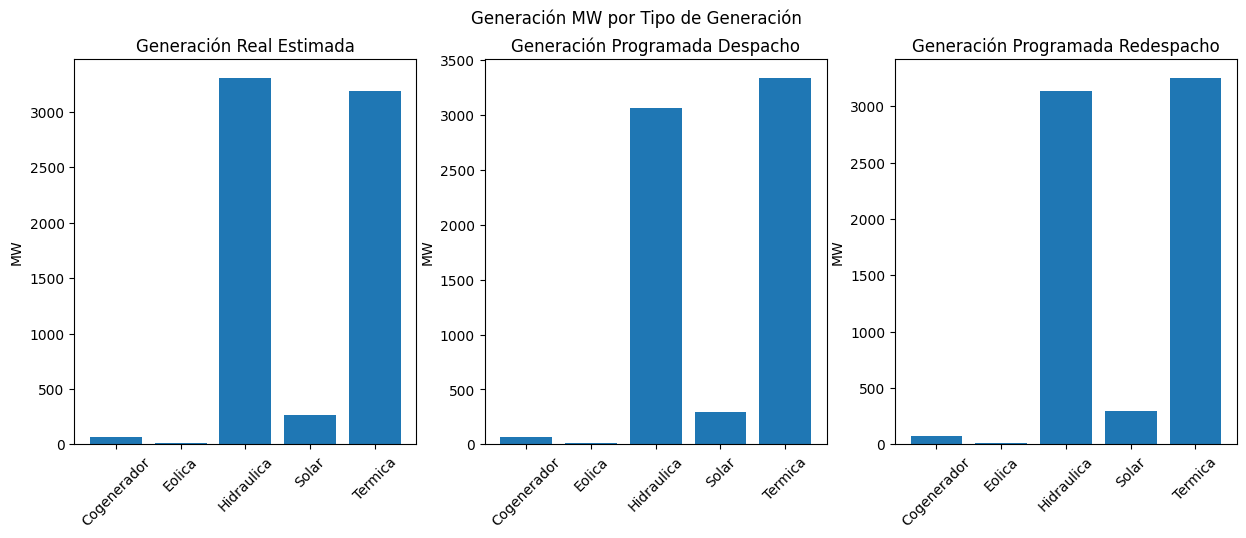

In [19]:
plt.figure(figsize=(15, 5))
plt.suptitle('Generación MW por Tipo de Generación')

plt.subplot(131)
plt.ylabel('MW')
plt.title('Generación Real Estimada')
plt.xticks(rotation=45)
plt.bar(data_gen_type.index, data_gen_type['Generacion Real Estimada'])

plt.subplot(132)
plt.ylabel('MW')
plt.title('Generación Programada Despacho')
plt.xticks(rotation=45)
plt.bar(data_gen_type.index, data_gen_type['Generacion Programada Despacho'])

plt.subplot(133)
plt.ylabel('MW')
plt.title('Generación Programada Redespacho')
plt.xticks(rotation=45)
plt.bar(data_gen_type.index, data_gen_type['Generacion Programada Redespacho'])

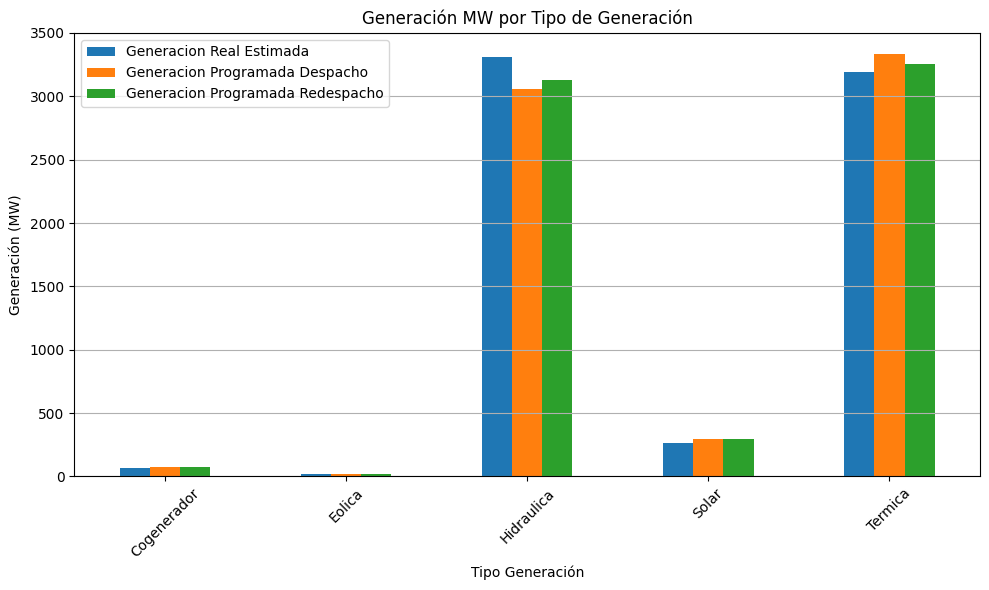

In [20]:
data_gen_type.plot(kind='bar', figsize=(10, 6))
plt.title('Generación MW por Tipo de Generación')
plt.ylabel("Generación (MW)")
plt.xlabel("Tipo Generación")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()